In [3]:
import pandapower as pp
import pandapower.plotting as plot
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
import numpy as np
import warnings
import copy
import seaborn as sns
import matplotlib.pyplot as plt
import time
import pandas as pd
from networkx.algorithms.bipartite.basic import color
from scipy.ndimage import label
from copy import deepcopy
from utils import run_time_series
from deap import base, creator, tools, algorithms
import multiprocessing
warnings.simplefilter(action="ignore", category=FutureWarning)

No or insufficient geodata available --> Creating artificial coordinates. This may take some time


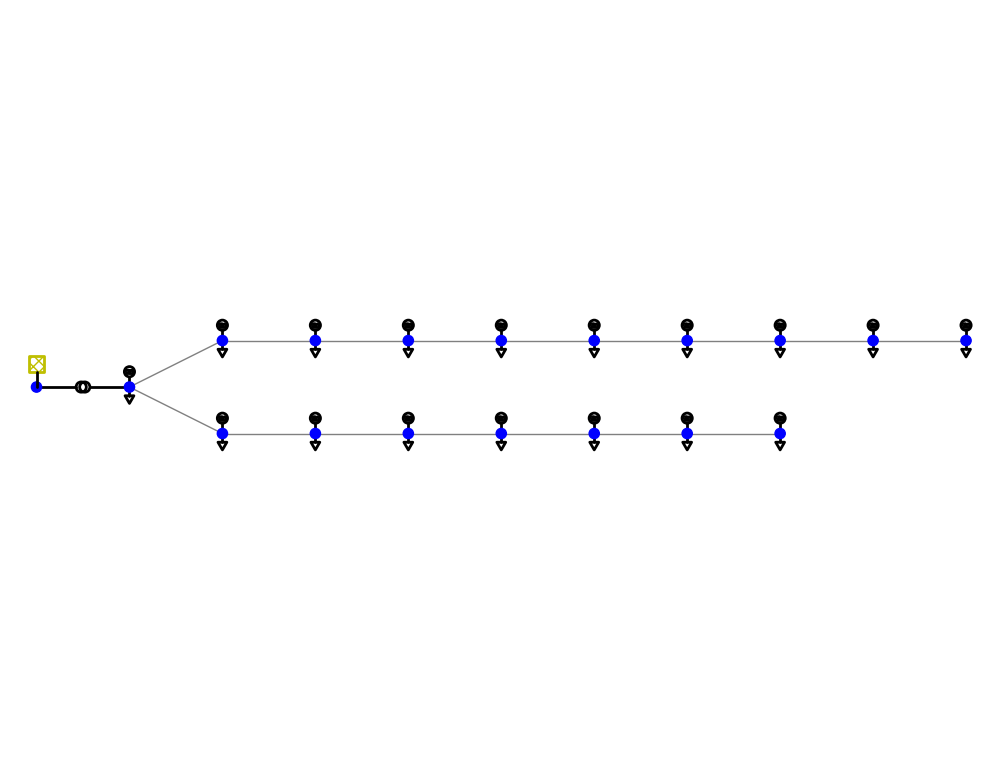

<Axes: >

In [4]:
net = pp.create_empty_network()

# create buses
b1 = pp.create_bus(net, vn_kv=20.0, name="Bus 1")
bus= []
for i in range(17):
    b = pp.create_bus(net, vn_kv=0.4, name="Bus {i}")
    bus.append(b)
   
pp.create_ext_grid(net, bus=b1, vm_pu=1.02, name="Grid Connection")

tid = pp.create_transformer(
    net, hv_bus=b1, lv_bus=bus[0], std_type="0.4 MVA 20/0.4 kV", name="Trafo"
)
pp.create_load(net, bus=bus[0], p_mw=0.01, q_mvar=0.005, name="Load")
pp.create_sgen(net, bus=bus[0], p_mw=0.01, q_mvar=0.005, name="Load")

for y in range (1,8):
    pp.create_line(
        net, from_bus=bus[y-1], to_bus=bus[y], length_km=0.100, name="Line", std_type="NAYY 4x50 SE"
    )
    pp.create_load(net, bus=bus[y], p_mw=0.01, q_mvar=0.005, name="Load")
    pp.create_sgen(net, bus=bus[y], p_mw=0.01, q_mvar=0.005, name="Load")

pp.create_line(
        net, from_bus=bus[0], to_bus=bus[8], length_km=0.100, name="Line", std_type="NAYY 4x50 SE")
pp.create_load(net, bus=bus[8], p_mw=0.01, q_mvar=0.005, name="Load")
pp.create_sgen(net, bus=bus[8], p_mw=0.01, q_mvar=0.005, name="Load")


for j in range (9,17):
    pp.create_line(
        net, from_bus=bus[j-1], to_bus=bus[j], length_km=0.100, name="Line", std_type="NAYY 4x50 SE"
    )
    pp.create_load(net, bus=bus[j], p_mw=0.01, q_mvar=0.005, name="Load")
    pp.create_sgen(net, bus=bus[j], p_mw=0.01, q_mvar=0.005, name="Load")

plot.simple_plot(net, plot_loads=True, plot_sgens=True)

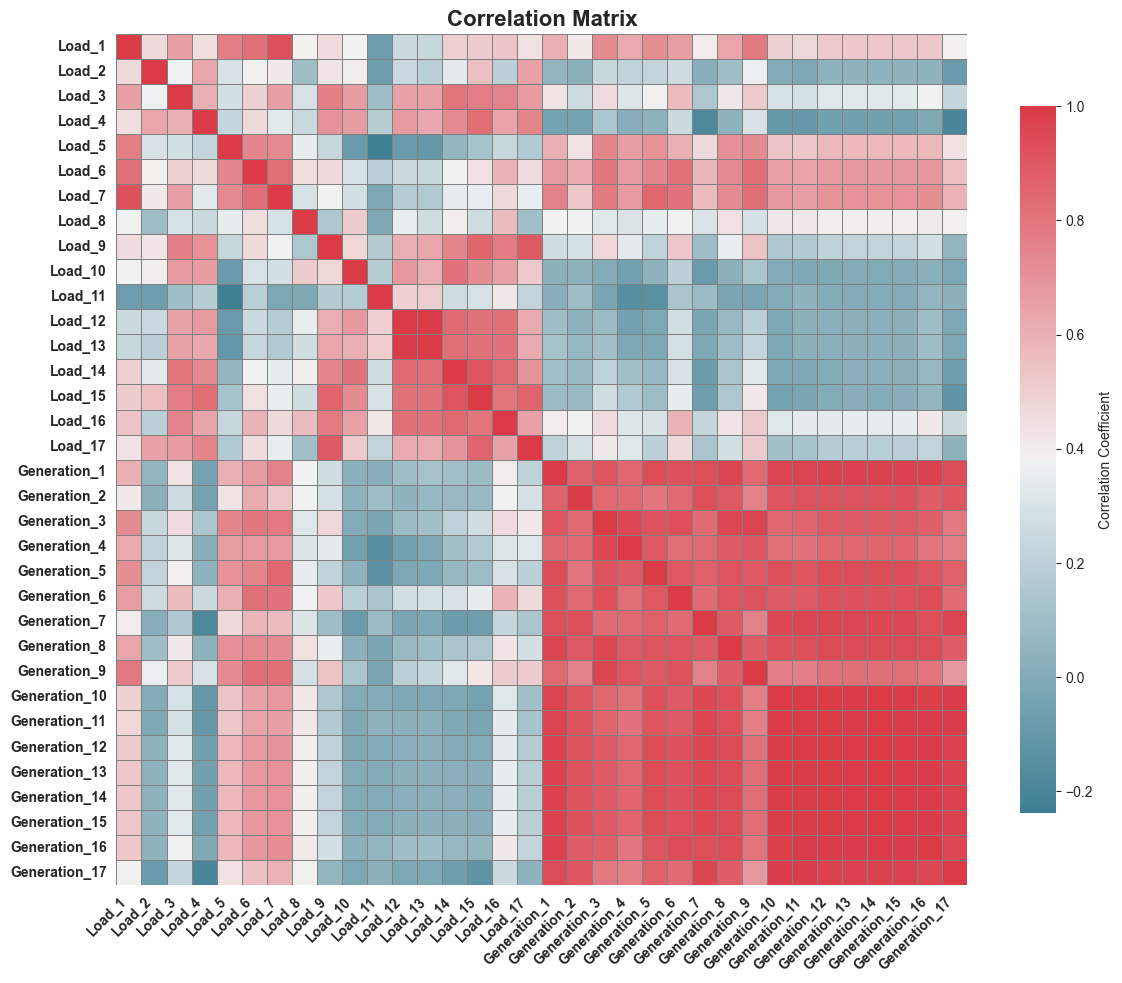

In [5]:
# Load the data
Load = pd.read_csv("LoadData_B.csv", index_col=0, names=["Index"] + [f"Load_{i}" for i in range(1, 18)], header=0)
Generation = pd.read_csv("GenerationData_B.csv", index_col=0,
                         names=["Index"] + [f"Generation_{i}" for i in range(1, 18)], header=0)

Combined = pd.concat([Load, Generation], axis=1)


plt.figure(figsize=(12, 10))  
plt.title("Correlation Matrix", fontweight='bold', fontsize=16)  


cmap = sns.diverging_palette(220, 10, as_cmap=True)


sns.heatmap(
    Combined.corr(),
    cmap=cmap,
    annot=False,
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},  
    linewidths=0.5,
    linecolor='gray' 
)

plt.xticks(rotation=45, ha='right', fontsize=10, fontweight='bold')
plt.yticks(rotation=0, fontsize=10, fontweight='bold')
plt.tight_layout()  
plt.show()


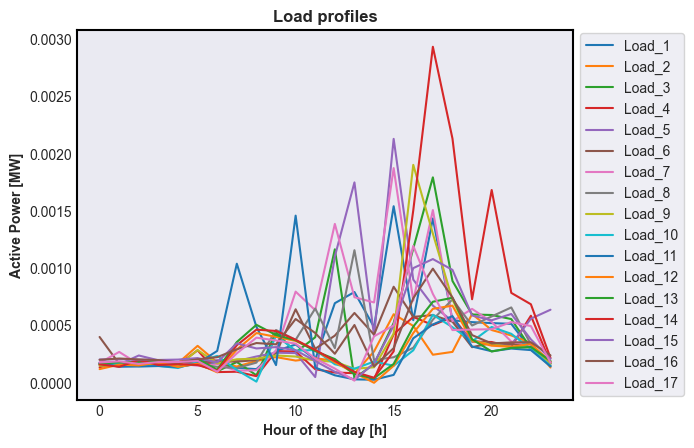

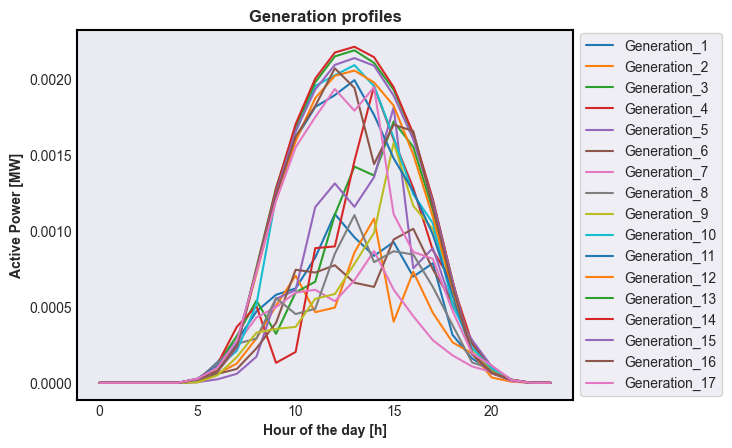

In [6]:
for column in Load:
    plt.plot(Load[column], label=column)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.xlabel("Hour of the day [h]", fontweight='bold')     
plt.ylabel("Active Power [MW]", fontweight='bold')      
plt.grid(False)                                          
plt.tick_params(axis='both', direction='in', length=5, width=1)  


plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
plt.title("Load profiles", fontweight='bold')
plt.show()

for column in Generation:
    plt.plot(Generation[column], label=column)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Position legend to the right of the plot
plt.xlabel("Hour of the day [h]", fontweight='bold')     # Bold x-axis label
plt.ylabel("Active Power [MW]", fontweight='bold')       # Bold y-axis label
plt.grid(False)                                          # Remove grid
plt.tick_params(axis='both', direction='in', length=5, width=1)  # Add ticks on both axes

# Add black box around the plot
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
plt.title("Generation profiles", fontweight='bold')
plt.show()

No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|██████████| 24/24 [00:02<00:00, 10.60it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|██████████| 24/24 [00:00<00:00, 188.33it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|██████████| 24/24 [00:00<00:00, 169.45it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|██████████| 24/24 [00:00<00:00, 153.18it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|██████████| 24/24 [00:00<00:00, 111.11it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|██████████| 24/24 [00:00<00:00, 127.45it/s]
No time ste

88.56231604505325
Load
[1, 11, 5, 13, 10, 15, 12, 2, 3, 0, 7, 14, 4, 9, 6, 16, 8]
Generator
[5, 10, 15, 12, 6, 11, 14, 2, 7, 8, 9, 13, 4, 1, 0, 16, 3]
